# Sequential bootstrap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

In [2]:
t1 = pd.to_datetime(pd.read_csv("../data/t1.csv", index_col=0, parse_dates=True, squeeze=True))

In [3]:
# t1 = t1[-30:]

In [4]:
def get_ind_matrix(bar_ix,t1):
    """Get Indicator matrix"""
    ind_m=(pd.DataFrame(0,index=bar_ix,columns=range(t1.shape[0])))
    for i,(t0,t1) in enumerate(t1.iteritems()):ind_m.loc[t0:t1,i]=1.
    return ind_m

def get_avg_uniqueness(ind_m):
    """Average uniqueness from indicator matrix"""
    c=ind_m.sum(axis=1) # concurrency
    u=ind_m.div(c,axis=0) # uniqueness
    avg_u=u[u>0].mean() # avg. uniqueness
    return avg_u

def seq_bootstrap(ind_m,s_length=None):
    """Generate a sample via sequential bootstrap"""
    if s_length is None:s_length=ind_m.shape[1]
    phi = list(pd.read_csv("../data/sb-phi.csv", squeeze=True))
    while len(phi)<s_length:
        clear_output()
        print(f"len(phi) is {len(phi)} which is < than s_length {s_length}")
        avg_u=pd.Series(dtype=float)
        for i in ind_m:
            ind_m_=ind_m[phi+[i]] # reduce ind_m
            avg_u.loc[i]=get_avg_uniqueness(ind_m_).iloc[-1]
        prob=avg_u/avg_u.sum() # draw prob
        phi+=[np.random.choice(ind_m.columns,p=prob)]
        pd.Series(phi, dtype=int).to_csv("../data/sb-phi.csv", index=False)
    return phi

In [5]:
override = input("Are you sure you want to override phi? Type 'YES' to change phi to []\n")
if override == "YES":
    print("OVERRIDDEN PHI")
    pd.Series([], dtype=int).to_csv("../data/sb-phi.csv", index=False)
else:
    print("No change")

Are you sure you want to override phi? Type 'YES' to change phi to []
 no


No change


In [ ]:
bar_ix=t1.index # index of bars
ind_m=get_ind_matrix(bar_ix,t1)
phi_random=np.random.choice(ind_m.columns,size=ind_m.shape[1])
phi_seq=seq_bootstrap(ind_m)
print(f'Standard uniqueness: {get_avg_uniqueness(ind_m[phi_random]).mean():.4f}')
print(f'Sequential uniqueness: {get_avg_uniqueness(ind_m[phi_seq]).mean():.4f}')

In [8]:
phi = list(pd.read_csv("../data/sb-phi.csv", squeeze=True))
len(phi)

419

In [18]:
phi = []
phi_uniqueness = 0
while True:
    try:
        phi_random=np.random.choice(ind_m.columns,size=ind_m.shape[1])
        uniqueness = get_avg_uniqueness(ind_m[phi_random]).mean()
        if uniqueness > phi_uniqueness:
            phi = phi_random
            phi_uniqueness = uniqueness
            clear_output()
            print(f'Highest uniqueness: {round(phi_uniqueness, 4)}')
    except:
        print("Stopping...")
        print(f'Highest uniqueness: {round(phi_uniqueness, 4)}')
        break

Highest uniqueness: 0.2349
Stopping...
Highest uniqueness: 0.2349


In [19]:
phi_seq = phi

In [20]:
seq = list(map(lambda x: t1.index[x], phi_seq))

In [21]:
new_t1 = t1.reindex(seq)

In [22]:
new_t1.head(), len(new_t1), len(t1)

(2019-11-19 04:31:17.939   2019-11-20 04:31:21.924
 2018-04-12 11:24:15.266   2018-04-13 11:24:15.733
 2018-05-31 17:46:02.417   2018-06-01 17:46:12.165
 2020-09-05 12:33:49.593   2020-09-06 12:33:56.010
 2018-02-01 12:27:38.036   2018-02-02 12:27:49.758
 Name: time, dtype: datetime64[ns],
 3367,
 3367)

In [23]:
new_t1.to_csv("../data/seq_bootstrap.csv")

In [67]:
# new_t1 = pd.to_datetime(pd.read_csv("../data/seq_bootstrap.csv", index_col=0, parse_dates=True, squeeze=True))

## Plotting

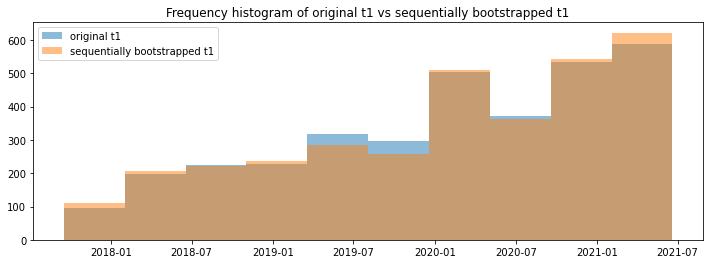

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(t1, alpha=.5, label="original t1")
ax.hist(new_t1, alpha=.5, label="sequentially bootstrapped t1")
ax.set_title("Frequency histogram of original t1 vs sequentially bootstrapped t1")
ax.legend();
